In [3]:
import dask
import dask.dataframe as dd

In [42]:
import matplotlib.pyplot as plt

In [4]:
df = dd.read_csv('/home/sagarrr/Desktop/in/combined/*.csv')

In [5]:
df.columns = ['ifa', 'city','day_part','geohash','user_age','device_name','device_os','device_manufacturer','device_platform','user_gender']

In [6]:
df.head(5)

,ifa,city,day_part,geohash,user_age,device_name,device_os,device_manufacturer,device_platform,user_gender
0,a6543545-8d00-41a1-a874-ad0a25fa9696,Guwahati,home,whgu1qv4f,0,Y69,ANDROID 7,Vivo,ANDROID,NaN
1,a6543545-8d00-41a1-a874-ad0a25fa9696,Guwahati,home,whgu7c0w3,0,Y69,ANDROID 7,Vivo,ANDROID,NaN
2,a6543545-8d00-41a1-a874-ad0a25fa9696,Guwahati,work,whgu7d5s5,0,Y69,ANDROID 7,Vivo,ANDROID,NaN
3,a6543545-8d00-41a1-a874-ad0a25fa9696,Guwahati,home,whgu7c0y2,0,Y69,ANDROID 7,Vivo,ANDROID,NaN
4,a6543545-8d00-41a1-a874-ad0a25fa9696,Jorhat,home,whgu7c0y2,0,Y69,ANDROID 7,Vivo,ANDROID,NaN


In [19]:
df1 = df.dropna()

In [22]:
df1 = df1[df1.device_name != "NIL"]

In [23]:
df1 = df1[df1.city != "NIL"]

In [24]:
df1 = df1[df1.device_platform != "NIL"]

In [25]:
df1 = df1[df1.device_os != "NIL"]

In [26]:
df1.head(5)

,ifa,city,day_part,geohash,user_age,device_name,device_os,device_manufacturer,device_platform,user_gender
15,f3011221-68af-4528-be30-c907e4b90a0c,Ahmedabad,work,ts7980rsb,22,Galaxy E7,ANDROID 5,Samsung,ANDROID,M
16,f3011221-68af-4528-be30-c907e4b90a0c,Pune,home,ts5e70tj1,22,Galaxy E7,ANDROID 5,Samsung,ANDROID,M
17,f3011221-68af-4528-be30-c907e4b90a0c,Ahmedabad,home,ts5e70sy4,22,Galaxy E7,ANDROID 5,Samsung,ANDROID,M
113,6ce3f4ed-12b4-4169-b350-a133b15657dd,Hyderabad,work,tg23y1phs,22,Galaxy J7 Max,ANDROID 8,Samsung,ANDROID,M
114,6ce3f4ed-12b4-4169-b350-a133b15657dd,Visakhapatnam,work,tdrn72pt9,22,Galaxy J7 Max,ANDROID 8,Samsung,ANDROID,M


In [55]:
bDict = {}

# input iteration 1

In [56]:
input_user_age = 22
input_device_manufacturer = "Samsung"

In [57]:
combined_input = str("Age : " + str(input_user_age) + " " + "Manufacturer : " + input_device_manufacturer )

# Retreival iteration 1

In [58]:
a = df1[(df1.user_age == input_user_age) & (df1.device_manufacturer == input_device_manufacturer )]

In [59]:
cnt = a.ifa.count().compute()

In [60]:
bDict[combined_input] = cnt

In [61]:
bDict

{'Age : 22 Manufacturer : Samsung': 118920}

# input iteration 2 

In [62]:
input_user_age = 23
input_device_manufacturer = "Xiaomi"

In [63]:
combined_input = str("Age : " + str(input_user_age) + " " + "Manufacturer : " + input_device_manufacturer )

# Retreival iteration 2

In [65]:
a = df1[(df1.user_age == input_user_age) & (df1.device_manufacturer == input_device_manufacturer )]

In [66]:
cnt = a.ifa.count().compute()

In [67]:
bDict[combined_input] = cnt

In [68]:
bDict

{'Age : 22 Manufacturer : Samsung': 118920,
 'Age : 23 Manufacturer : Xiaomi': 31833}

# Visualization

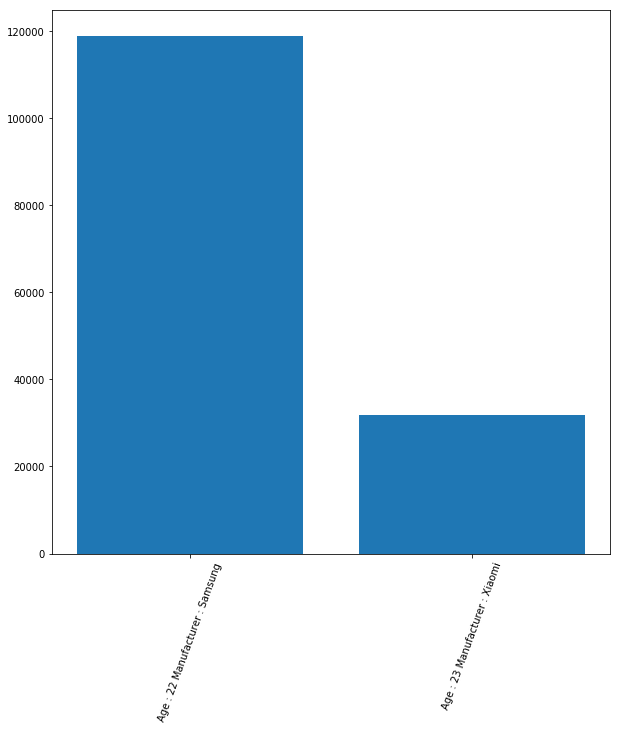

In [69]:
plt.bar(range(len(bDict)), bDict.values())
plt.xticks(range(len(bDict)), list(bDict.keys()))
plt.gcf().set_size_inches((10, 10)) 
plt.xticks(rotation=70)
plt.show()